# 半监督SVM

## 摘要

我们介绍了一种半监督支持向量机（S3yM）方法。给定一个包含标签数据的训练集和一个未标签数据的工作集，S3yM 使用这两个集合来构建支持向量机。我们使用 S3yM 来解决由 Yapnik 提出的整体风险最小化（ORM）的转导问题。转导问题是在工作集给定点上估计分类函数的值。这与标准的归纳学习问题形成对比，后者估计所有可能值上的分类函数，然后使用固定的函数来推断工作集数据的类别。我们提出了一个通用的 S3yM 模型，该模型基于所有可用数据最小化误分类错误和函数容量。我们展示了如何将 I-范数线性支持向量机的 S3yM 模型转换为混合整数程序，然后使用整数规划精确求解。在十个数据集上比较了 S3yM 和标准 I-范数支持向量机方法的结果。我们的计算结果支持统计学习理论的结果，显示在训练信息不足时，合并工作数据可以改善泛化。在每种情况下，S3yM 要么改进了泛化，要么与传统方法相比没有显著差异。

## 1. 介绍

在本工作中，我们提出了一种用于半监督支持向量机（S3VM）的方法。S3VM是通过混合标记数据（训练集）和未标记数据（工作集）构建的。目标是为工作集分配类别标签，以构建“最佳”的支持向量机（SVM）。如果工作集为空，则该方法成为标准的SVM分类方法[20, 9, 8]。如果训练集为空，则该方法成为一种无监督学习方法。当训练集和工作集都不为空时，发生半监督学习。对于训练集小而工作集大的问题，半监督学习是一种半监督聚类形式。存在成功的半监督k-means和模糊c-means聚类算法[4, 18]。聚类也是S3VM的一个潜在应用。当训练集相对于工作集较大时，S3VM可以被视为根据Vapnik在1998年NIPS SVM研讨会和[19, 第10章]中提出的整体风险最小化（ORM）原则解决转导问题的方法。本文关注的是ORM的S3VM。

在分类中，转导问题是在未标记工作集中的每个给定点估计类别。通常的支持向量机（SVM）方法使用统计风险最小化（SRM）原则估计整个分类函数。在转导中，使用来自训练集和工作集数据的信息在工作集内估计分类函数。从理论上讲，如果有足够的训练数据来满意地估计函数，则SRM就足够了。然而，如果训练数据不足，则ORM可能改善工作集上的泛化。

直观地说，当训练集很小或训练集和工作集总体的子样本之间存在显著偏差时，我们预计ORM会带来改进。实际上，[19]中的理论结果支持这些假设。

在第二部分，我们简要回顾了用于结构风险最小化的标准SVM模型。根据结构风险最小化的原则，SVM使用训练数据最小化经验误分类率和分类函数的容量[19, 20]。函数的容量由基于训练集的两类之间的间隔确定。ORM也同时最小化经验误分类率和函数容量。但是，函数的容量是使用训练集和工作集确定的。在第三部分，我们展示了如何将SVM扩展到半监督情况，以及如何实际使用混合整数规划来解决相应的问题。在第四部分，我们计算比较了在十个问题上由结构风险最小化和整体风险最小化构建的支持向量机。我们的计算结果支持过去的理论结果，即在训练集和工作集样本分布之间存在偏差时，在训练过程中融入工作集信息可以获得更好的泛化。在十个真实世界问题中的三个问题中，半监督方法S3VM获得了显著的泛化提高。在任何情况下，S3VM都没有获得显著的泛化降低。我们以讨论更一般的SVM算法结束。

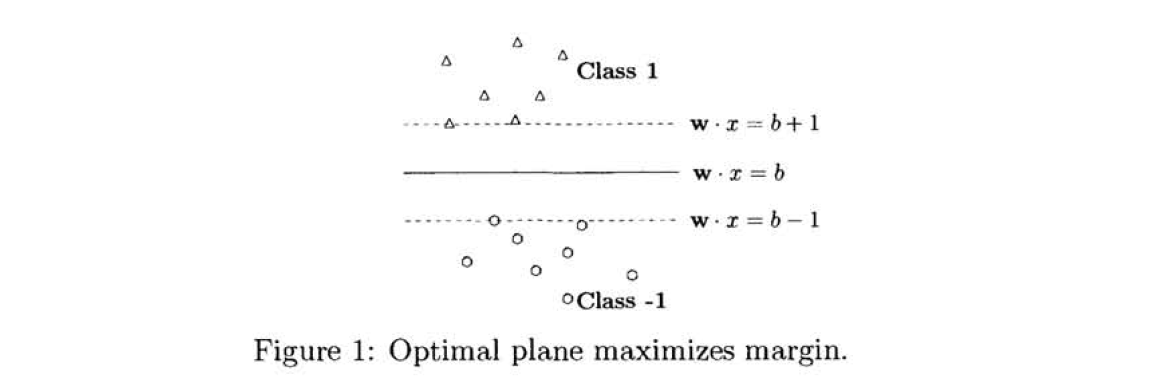

## 2. SVM使用结构风险最小化

基本SRM任务是用输入输出训练数据估计一个分类函数$f:R^N\to\{\pm1\}$，这些数据来自两个类别
$$(\mathbf{x}_1,y_1),\ldots,(\mathbf{x}_\ell,y_\ell)\in R^n\times\{\pm1\}.$$

函数$f$应该正确地对未见示例$(\mathbf{x},y)$进行分类，即如果$(\mathbf{x},y)$是从与训练数据相同的潜在概率分布生成的，则$f(\mathbf{x})=y$。在本工作中，我们仅讨论线性分类函数。我们将在第5节讨论非线性情况的扩展。如果点线性可分，则存在一个$n$向量$\mathbf{w}$和一个标量$b$，使得

$$\begin{aligned}&\mathbf{w}\cdot x_{i}-b\geq1\quad if\:y_{i}=1,\\&\mathbf{w}\cdot x_{i}-b\leq-1\quad if\:y_{i}=-1,\:i=1,\ldots,\ell\end{aligned}$$

或者等价地

$$y_i[\mathbf{w}\cdot x_i-b]\geq1,\:i=1,\ldots,\ell.$$

“最优”分隔平面$\mathbf{w}\cdot x=b$是距离两个类别中最接近点最远的平面。从几何上讲，这等价于最大化两平行平面$\mathbf{w}\cdot x=b+1$和$\mathbf{w}\cdot x=b-1$之间的分离边界或距离（见图1）。

在实际误分类率方面，较大的边界应该导致更好的泛化并防止在高维属性空间中的过拟合。这个分类器被称为支持向量机，因为解只依赖于位于两个支撑平面w$\cdot x=b-1$和w$\cdot x=b+1$上的点（称为支持向量）。通常情况下，类别将不是可分的，所以使用广义最优平面（GOP）问题（4）[9,20]。为每个点添加了一个松弛项$\eta_{i}$，以便如果该点被误分类，$\eta_{i}\geq1$。最终的GOP公式为：
$$\begin{aligned}\min_{\mathbf{W},b,\eta}&C\sum_{i=1}^{\ell}\eta_{i}+\frac{1}{2}\left\|\mathbf{w}\right\|^{2}\\s.t.&y_{i}[\mathbf{w}\cdot x_{i}-b]+\eta_{i}\geq1\\&\eta_{i}\geq0,\quad i=1,\ldots,\ell\end{aligned}$$
(4)
其中$C>0$是一个固定的惩罚参数。由边界最大化提供的能力控制对于实现良好的泛化是至关重要的[21,19]。
鲁棒线性规划（RLP）方法与GOP相同，只是将边界项从2范数$\|\mathbf{w}\|_2$更改为1范数，$\|\mathbf{w}\|_1=\sum_{j=1}^n|w_j|$.问题转变为以下鲁棒线性规划（RLP）[2,7]：

$$\begin{aligned}\min_{\mathbf{W},b,s,\eta}&C\sum_{i=1}^{\ell}\eta_{i}+\sum_{j=1}^{n}s_{j}\\s.t.&y_{i}[\mathbf{w}\cdot x_{i}-b]+\eta_{i}\geq1\\&\eta_{i}\geq0,\quad i=1,\ldots,\ell\\&-s_{j} \leq w_{j} \leq s_{j},\quad j=1,\ldots,n.\end{aligned}$$

RLP公式是SVM的一个有用的变体，具有一些良好的特性。1-范数权重减少仍然提供能力控制。[13]中的结果可以用来表明，最小化$\|\mathbf{w}\|_1$相当于使用无穷范数最大化分离边界。统计学习理论可能被扩展以包括替代范数。RLP相比于GOF的一个主要好处是降低了维度。RLP和GOF都在最小化权重$\mathbf{w}$的大小。但是RLP由于1-范数的特性，迫使更多的权重为0。RLP相比于GOF的另一个好处是，它可以使用线性规划而不是二次规划来解决。这两种方法都可以通过使用核函数来扩展以处理非线性判别[8,12]。关于这些方法的实证比较并未发现两种公式在泛化性能上有显著差异[5,7,3,12]。

## 3. 半监督SVM
为了构建S3VM，我们从SVM的公式（4）或（5）开始，然后为工作集中的每个点添加两个约束。一个约束计算该点如果属于类别1时的误分类误差，另一个约束计算该点如果属于类别-1时的误分类误差。目标函数计算这两个可能误分类误差的最小值。点的最终类别对应于导致误差最小的那个。具体来说，我们定义半监督支持向量机问题（S3VM）如下：

$$\begin{aligned}&\min_{\mathbf{W},b,\eta,\xi,z}C\left[\sum_{i=1}^{\ell}\eta_{i}+\sum_{j=\ell+1}^{\ell+k}min(\xi_{j},z_{j})\right]+\parallel\mathbf{w}\parallel\\&

y_{i}(\mathbf{w}\cdot x_{i}+b)+\eta_{i}\geq1\quad\eta_{i}\geq0\quad i=1,\ldots,\ell\\&\mathbf{w}\cdot x_{j}-b+\xi_{j}\geq1\quad\xi_{j}\geq0\quad j=\ell+1,\ldots,\ell+k\\&-(\mathbf{w}\cdot x_{j}-b)+z_{j}\geq1\quad z_{j}\geq0\end{aligned}$$

其中$C>0$是一个固定的误分类惩罚参数。

可以使用整数规划来解决这个问题。基本思想是为工作集中的每个点$\mathbf{x}_j$添加一个0或1的决策变量$d_j$。这个变量表示点的类别。如果$d_j=1$，则点属于类别1；如果$d_j=0$，则点属于类别-1。这导致以下混合整数规划问题：

$$

\min_{\mathbf{W},b,\eta,\xi,z,d}\quad C\left[\sum_{\iota=1}^{\ell}\eta_{\iota}+\sum_{j=\ell+1}^{\ell+k}(\xi_{j}+z_{j})\right]+\parallel\mathbf{w}\parallel 

$$
$$y_{i}(\mathbf{w}\cdot x_{i}-b)+\eta_{i}\geq1\quad\eta_{i}\geq0\quad i=1,\ldots,\ell\\\mathbf{w}\cdot x_{j}-b+\xi_{j}+M(1-d_{j})\geq1\quad\xi_{j}\geq0\quad j=\ell+1,\ldots,\ell+k\\-(\mathbf{w}\cdot x_{j}-b)+z_{j}+Md_{j}\geq1\quad z_{j}\geq0\quad d_{j}=\{0,1\}$$

常数$M>0$选择得足够大，以便如果$d_j=0$，则对于任何最优的$\mathbf{w}$和$b$，$\xi_j=0$是可行的。同样，如果$d_j=1$，则$z_j=0$。如果计算资源足够处理问题规模，可以使用CPLEX或其他商业混合整数规划代码[10]找到这个问题的全局最优解。使用数学编程模型语言AMPL[11]，我们能够用三十行代码加上一个数据文件表达这个问题，并使用CPLEX解决它。

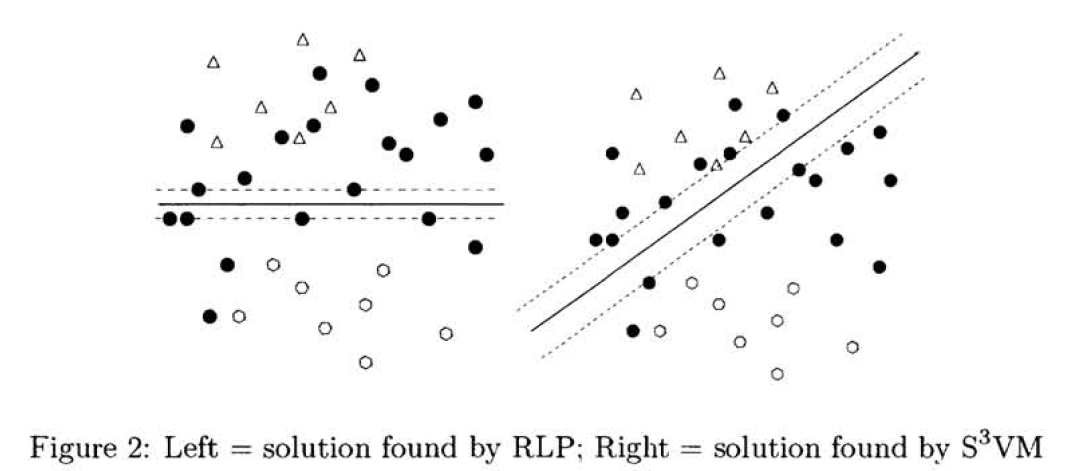

## 4. S3VM和总体风险最小化

可以使用整数S3YM来解决整体风险最小化问题。

考虑[19]中图20给出的简单问题。仅使用RLP对训练数据进行分类，得到的结果如图1所示。图2展示了当添加工作集数据时的情况。训练集点以透明三角形和六边形显示。工作集点以实心圆显示。图2左图显示了RLP找到的解决方案。注意，当添加工作集点时，得到的分离边界非常小。右图显示了使用未标记工作集构建的S3YM解决方案。注意，找到了更大、更清晰的分离边界。这些计算解决方案与[19]中呈现的解决方案相同。

我们还对十个真实数据集（其中八个来自[14]，另外两个来自[15]的亮星系和暗星系集）测试了S3YM。没有整合工作集信息的算法已经成功应用于这些问题。因此，事先不清楚S3YM是否会改进这些数据集的泛化。对于那些不可能改进的数据集，我们希望使用ORM的转导不会降低通过SRM方法诱导的性能。对于每个数据集，我们进行了10折交叉验证。对于三个带星号的数据集，由于CPLEX算法内部需要过多的分支，我们的整数规划求解器失败。在这些数据集上，我们为每次试验随机提取了50个点的工作集。在RLP和S3YM问题中，每个数据集都使用了相同的C参数（C的公式为$C=\frac{1-\lambda}{\lambda(\ell+k)}$，其中$\lambda=.001$，$\ell$是训练集的大小，$k$是工作集的大小。选择这个公式是因为它在两种方法中经验上效果很好）。在所有十个问题中，S3YM的表现从未明显低于RLP。在三个问题中，S3YM的表现显著更好。因此，ORM没有损害泛化，而且在某些情况下显著帮助了泛化。我们会基于ORM理论预期这一点。ORM的泛化边界取决于训练集和工作集之间的差异。如果差异很小，我们不会期望使用ORM有任何改进。

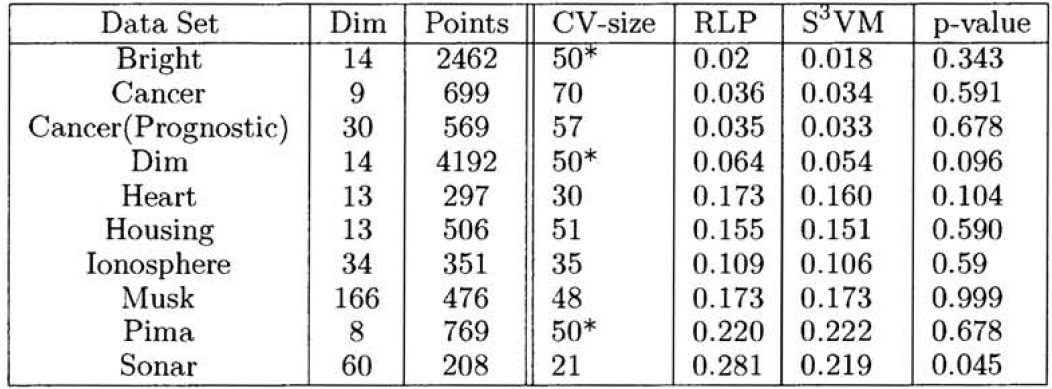


## 5. 结论

我们介绍了一个半监督SVM模型。S3VM使用来自训练集和工作集的所有可用数据构建支持向量机。我们展示了如何将I范数线性支持向量机的S3VM模型转换为混合整数规划。使用整数编程解决S3VM的一个巨大优势是，可以使用如CPLEX之类的软件包找到全局最优解。使用整数SVM，我们对Vapnik提出的使用整体风险最小化的转导进行了实证研究。我们的结果表明，当训练信息不足时，整合工作数据可以提高泛化，这与统计学习理论的结果一致。在每种情况下，与通常的结构风险最小化方法相比，S3VM要么改进了要么在泛化上没有显著差异。我们的实证结果与[19]中的理论结果相结合，表明通过ORM进行转导是一个非常具有前景的研究方向。

许多研究问题仍然存在。由于通过整体风险最小化的转导并不总是比基本的通过结构风险最小化的诱导更好，我们能否事先确定可能从转导中受益的问题？对于2范数情况和非线性函数构建S3VM的最佳方法仍然是开放的问题。可以将基于核的方法整合到S3VM中。该方法的实际可扩展性需要探索。我们能够使用通用整数规划代码解决大约有50个工作集点的适度规模问题。最近专门为支持向量机设计的算法的成功[16, 17, 6]表明，这些方法也可能对S3VM产生改进。

## 参考文献

[1] K. P. Bennett 和 E. J. Bredensteiner. 学习中的几何。在 C. Gorini, E. Hart, W. Meyer, 和 T. Phillips 编辑的《工作中的几何》，华盛顿特区，1997年。美国数学协会。即将出版。

[2] K. P. Bennett 和 O. L. Mangasarian. 对两个线性不可分集合的鲁棒线性规划鉴别。《优化方法与软件》，1:23-34, 1992。

[3] K. P. Bennett, D. H. Wu, 和 L. Auslender. 关于数据库营销的支持向量决策树。R.P.I. 数学报告号 98-100，伦斯勒理工学院，纽约特洛伊，1998。

[4] A. M. Bensaid, L. O. Hall, J. C. Bezdek, 和 L. P. Clarke. 用于图像分割的部分监督聚类。《模式识别》，29(5):859-871, 199。

[5] P. S. Bradley 和 O. L. Mangasarian. 通过凹函数最小化和支持向量机进行特征选择。《数学规划技术报告》98-03，威斯康辛大学麦迪逊分校，1998。即将出现在ICML-98中。

[6] P. S. Bradley 和 O. L. Mangasarian. 通过线性支持向量机处理大规模数据鉴别。《数学规划技术报告》98-05，威斯康辛大学麦迪逊分校，1998。已提交出版。

[7] E. J. Bredensteiner 和 K. P. Bennett. 决策树中的特征最小化。《计算优化及应用》，10:110-126, 1997。

[8] C. J. C. Burges. 支持向量机的模式识别教程。《数据挖掘与知识发现》，1998。即将出版。

[9] C. Cortes 和 V. N. Vapnik. 支持向量网络。《机器学习》，20:273-297, 1995。

[10] CPLEX优化公司，内华达州因克莱恩村。使用CPLEX可调用库，1994。

[11] R. Fourer, D. Gay, 和 B. Kernighan. AMPL: 一个数学规划建模语言。Boyd 和 Frazer，马萨诸塞州丹弗斯，1993。

[12] T. T. Fries 和 R. Harrison Fries. 用于模式分类和回归估计的线性规划支持向量机：及其SR算法。研究报告706，谢菲尔德大学，1998。

[13] O. L. Mangasarian. 最节约的最小范数近似。《数学规划技术报告》97-03，威斯康辛大学麦迪逊分校，1997。即将出现在《计算优化及应用》中。

[14] P. M. Murphy 和 D. W. Aha. UCI机器学习数据库库。加利福尼亚大学欧文分校信息与计算科学系，加利福尼亚，1992。

[15] S. Odewahn, E. Stockwell, R. Pennington, R. Humphreys, 和 W. Zumach. 使用神经网络的自动星/星系鉴别。《天文学杂志》，103(1):318-331,1992。

[16] E. Osuna, R. Freund, 和 F. Girosi. 支持向量机：培训和应用。人工智能备忘录1602，麻省理工学院，1997。

[17] J. Platt. 顺序最小优化：一个用于训练支持向量机的快速算法。《微软研究技术报告》98-14，1998。

[18] M. Vaidyanathan, R. P. Velthuizen, P. Venugopal, L. P. Clarke, 和 L. O. Hall. 使用监督和半监督MRI分割测量肿瘤体积。在《人工神经网络工程会议》，ANNIE(1994)，1994。

[19] V. N. Vapnik. 基于经验数据的依赖估计。施普林格，纽约，1982。英文版，俄文版1979。

[20] V. N. Vapnik. 统计学习理论的本质。施普林格出版社，纽约，1995。

[21] V. N. Vapnik 和 A. Ja. Chervonenkis. 模式识别理论。纳乌卡出版社，莫斯科，1974。俄文版。
